# Youth India Foundation E-School's Internship Entrance Assesment

### Author : Jawahar

## Twitter Sentiment Analysis

In [10]:
#for data exploring
import pandas as pd

In [11]:
tweet_df = pd.read_csv('C:\\Users\\jawah\Dropbox\\My PC (LAPTOP-VFH8S4EU)\\Downloads\\Youth india foundation ai ml internship\\dataset\\dataset.csv',
                      encoding = "ISO-8859-1")

In [12]:
tweet_df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [13]:
tweet_df = tweet_df.iloc[:,1:]
tweet_df.head()

,Sentiment,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...


In [14]:
tweet_df.info()
tweet_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sentiment      99989 non-null  int64 
 1   SentimentText  99989 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


,Sentiment
count,99989.000000
mean,0.564632
std,0.495808
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [15]:
tweet_df['Sentiment'].value_counts()

1    56457
0    43532
Name: Sentiment, dtype: int64

In [16]:
## cleaning the data
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

### Stemming

In [17]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(tweet_df)):
    review = re.sub('[^a-zA-Z]', ' ',tweet_df['SentimentText'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [18]:
corpus[:5]

['sad apl friend',
 'miss new moon trailer',
 'omg alreadi',
 'omgaga im sooo im gunna cri dentist sinc supos get crown put min',
 'think mi bf cheat']

In [39]:
df = pd.DataFrame(tweet_df['Sentiment'])
df['text'] = corpus

In [40]:
df.head()

,Sentiment,text
0,0,sad apl friend
1,0,miss new moon trailer
2,1,omg alreadi
3,0,omgaga im sooo im gunna cri dentist sinc supos...
4,0,think mi bf cheat


In [56]:
positiveTweets = df[df['Sentiment']==1]
negativeTweets = df[df['Sentiment']==0]

In [57]:
positive_text = ' '.join(positiveTweets['text'].tolist())
negativeText = ' '.join(negativeTweets['text'].tolist())

### Positively impacted words visualization

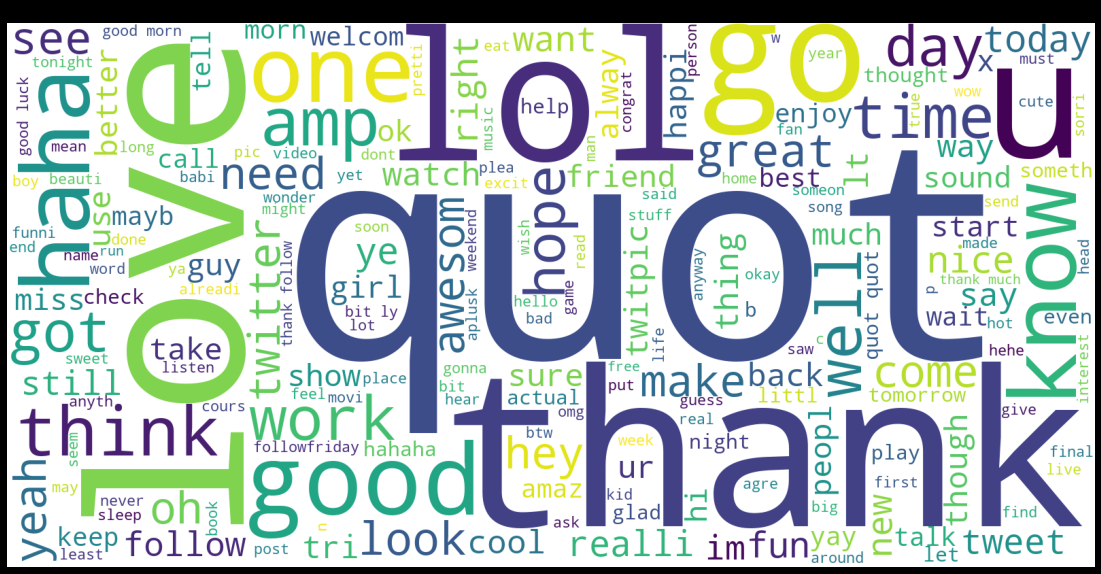

In [63]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(positive_text)
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [64]:
plt.savefig('Positivewordcloud.png', facecolor='k', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

### Negatively impacted words visualization

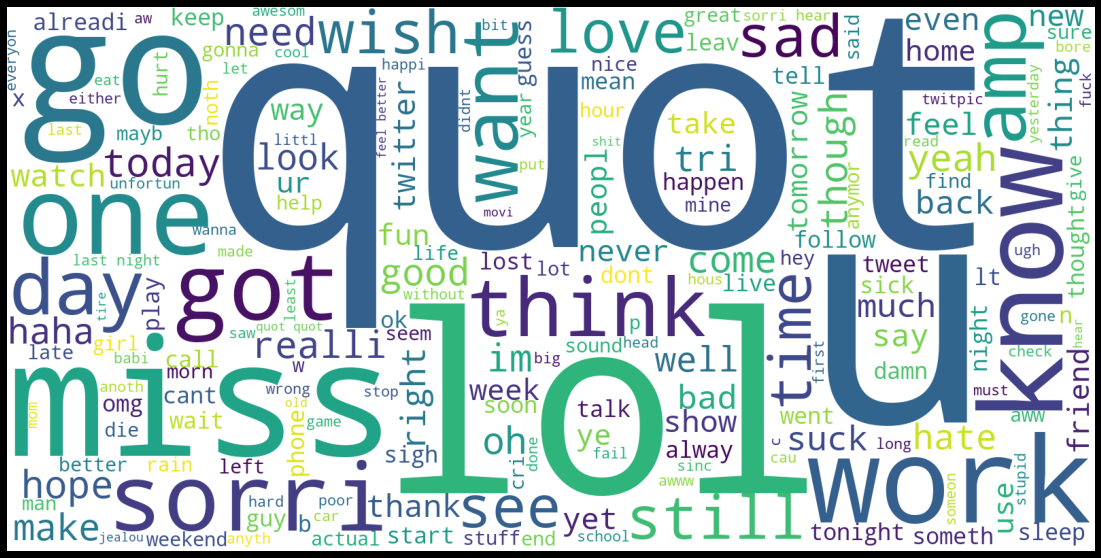

In [67]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(negativeText)
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [68]:
plt.savefig('Negativewordcloud.png', facecolor='k', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

### Converting the words into vectors using bag of words method

In [19]:
#bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=50000)
X = cv.fit_transform(corpus)
y = tweet_df['Sentiment']

In [20]:
X.shape

(99989, 50000)

### Splitting the data into train and test

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

### Model Building

### Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier()
random.fit(X_train, y_train)
y_pred=random.predict(X_test)
y_pred_train = random.predict(X_train)

### Validating the train data

In [14]:
#train data predictions
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
matrix=confusion_matrix(y_train, y_pred_train)
print(matrix)
score=accuracy_score(y_train, y_pred_train)
print(score)
report=classification_report(y_train, y_pred_train)
print(report)

[[34644   106]
 [  181 45060]]
0.9964120963608406
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     34750
           1       1.00      1.00      1.00     45241

    accuracy                           1.00     79991
   macro avg       1.00      1.00      1.00     79991
weighted avg       1.00      1.00      1.00     79991



### validating the test data 

In [15]:
#test data predictions
matrix=confusion_matrix(y_test, y_pred)
print(matrix)
score=accuracy_score(y_test, y_pred)
print(score)
report=classification_report(y_test, y_pred)
print(report)

[[6274 2508]
 [2911 8305]]
0.729022902290229
              precision    recall  f1-score   support

           0       0.68      0.71      0.70      8782
           1       0.77      0.74      0.75     11216

    accuracy                           0.73     19998
   macro avg       0.73      0.73      0.73     19998
weighted avg       0.73      0.73      0.73     19998



### Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred=log.predict(X_test)
y_pred_train = log.predict(X_train)

C:\Users\jawah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Validating the train data

In [17]:
#train data predictions
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
matrix=confusion_matrix(y_train, y_pred_train)
print(matrix)
score=accuracy_score(y_train, y_pred_train)
print(score)
report=classification_report(y_train, y_pred_train)
print(report)

[[27481  7269]
 [ 4531 40710]]
0.8524834043829931
              precision    recall  f1-score   support

           0       0.86      0.79      0.82     34750
           1       0.85      0.90      0.87     45241

    accuracy                           0.85     79991
   macro avg       0.85      0.85      0.85     79991
weighted avg       0.85      0.85      0.85     79991



### validating the test data 

In [18]:
#test data predictions
matrix=confusion_matrix(y_test, y_pred)
print(matrix)
score=accuracy_score(y_test, y_pred)
print(score)
report=classification_report(y_test, y_pred)
print(report)

[[5814 2968]
 [2121 9095]]
0.7455245524552455
              precision    recall  f1-score   support

           0       0.73      0.66      0.70      8782
           1       0.75      0.81      0.78     11216

    accuracy                           0.75     19998
   macro avg       0.74      0.74      0.74     19998
weighted avg       0.74      0.75      0.74     19998



### Multinomial Naive bayes

In [19]:
from sklearn.naive_bayes import MultinomialNB
naive = MultinomialNB()
naive.fit(X_train, y_train)
y_pred=naive.predict(X_test)
y_pred_train = naive.predict(X_train)

### Validating the train data

In [20]:
#train data predictions
matrix=confusion_matrix(y_train, y_pred_train)
print(matrix)
score=accuracy_score(y_train, y_pred_train)
print(score)
report=classification_report(y_train, y_pred_train)
print(report)

[[27684  7066]
 [ 6074 39167]]
0.835731519795977
              precision    recall  f1-score   support

           0       0.82      0.80      0.81     34750
           1       0.85      0.87      0.86     45241

    accuracy                           0.84     79991
   macro avg       0.83      0.83      0.83     79991
weighted avg       0.84      0.84      0.84     79991



### validating the test data 

In [21]:
#test data predictions
matrix=confusion_matrix(y_test, y_pred)
print(matrix)
score=accuracy_score(y_test, y_pred)
print(score)
report=classification_report(y_test, y_pred)
print(report)

[[6102 2680]
 [2530 8686]]
0.7394739473947395
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      8782
           1       0.76      0.77      0.77     11216

    accuracy                           0.74     19998
   macro avg       0.74      0.73      0.74     19998
weighted avg       0.74      0.74      0.74     19998



### Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
y_pred_train = dtc.predict(X_train)

### Validating the train data

In [23]:
#train data predictions
matrix=confusion_matrix(y_train, y_pred_train)
print(matrix)
score=accuracy_score(y_train, y_pred_train)
print(score)
report=classification_report(y_train, y_pred_train)
print(report)

[[34688    62]
 [  224 45017]]
0.9964245977672488
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     34750
           1       1.00      1.00      1.00     45241

    accuracy                           1.00     79991
   macro avg       1.00      1.00      1.00     79991
weighted avg       1.00      1.00      1.00     79991



### validating the test data 

In [24]:
#test data predictions
matrix=confusion_matrix(y_test, y_pred)
print(matrix)
score=accuracy_score(y_test, y_pred)
print(score)
report=classification_report(y_test, y_pred)
print(report)

[[5956 2826]
 [3749 7467]]
0.6712171217121712
              precision    recall  f1-score   support

           0       0.61      0.68      0.64      8782
           1       0.73      0.67      0.69     11216

    accuracy                           0.67     19998
   macro avg       0.67      0.67      0.67     19998
weighted avg       0.68      0.67      0.67     19998



### Gradient Boosting Classifier

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=12)
gb.fit(X_train, y_train)
y_pred_train = gb.predict(X_train)
y_pred = gb.predict(X_test)

### Validating the train data

In [26]:
#train data predictions
matrix=confusion_matrix(y_train, y_pred_train)
print(matrix)
score=accuracy_score(y_train, y_pred_train)
print(score)
report=classification_report(y_train, y_pred_train)
print(report)

[[12559 22191]
 [ 3145 42096]]
0.6832643672413147
              precision    recall  f1-score   support

           0       0.80      0.36      0.50     34750
           1       0.65      0.93      0.77     45241

    accuracy                           0.68     79991
   macro avg       0.73      0.65      0.63     79991
weighted avg       0.72      0.68      0.65     79991



### validating the test data 

In [27]:
#test data predictions
matrix=confusion_matrix(y_test, y_pred)
print(matrix)
score=accuracy_score(y_test, y_pred)
print(score)
report=classification_report(y_test, y_pred)
print(report)

[[ 3185  5597]
 [  827 10389]]
0.6787678767876788
              precision    recall  f1-score   support

           0       0.79      0.36      0.50      8782
           1       0.65      0.93      0.76     11216

    accuracy                           0.68     19998
   macro avg       0.72      0.64      0.63     19998
weighted avg       0.71      0.68      0.65     19998



### Conclusion

By Comparing all the model performance, we can clearly understand that Random forest classifier model and decision tree classifier model are affected by overfitting. It was trained well, but done poor predictions. Apart from those model, every other model are performed quite similar on both train and test data. In that Logistic regression gaves better accuracy of 0.75, f1score, precision, recall. So that, I'm finalizing the Logistic 